In [157]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt

In [158]:
billing = pd.read_csv("data/billing.csv", sep=';')
billing = billing.dropna(subset=['monthlycharges'])
billing

,customerid,billing_date,monthlycharges,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,phone_lines,streaming
0,3d40ba9d86cc7b97612628a924cd63bc,2023-01-31,29.85,DSL,No,Yes,No,No,0,No
1,3d40ba9d86cc7b97612628a924cd63bc,2023-02-28,29.85,DSL,No,Yes,No,No,0,No
2,3d40ba9d86cc7b97612628a924cd63bc,2023-03-31,29.85,DSL,No,Yes,No,No,0,No
3,3d40ba9d86cc7b97612628a924cd63bc,2023-04-30,35.82,DSL,No,Yes,No,No,0,No
4,3d40ba9d86cc7b97612628a924cd63bc,2023-05-31,35.82,DSL,No,Yes,No,No,0,No
...,...,...,...,...,...,...,...,...,...,...
100775,7aea14389aa3d73fd383221574f76778,2023-04-30,70.60,Fiber optic,No,No,No,No,1,No
100776,7aea14389aa3d73fd383221574f76778,2023-05-31,70.60,Fiber optic,No,No,No,No,1,No
100777,7aea14389aa3d73fd383221574f76778,2023-06-30,70.60,Fiber optic,No,No,No,No,1,No
100778,7aea14389aa3d73fd383221574f76778,2023-07-31,70.60,Fiber optic,No,No,No,No,1,No


In [159]:
clients = pd.read_parquet('data/clients.parquet')
clients

,customerid,gender,paperlessbilling,paymentmethod,children,contract_date,married,birth_date,churn_date,country,zipcode,contract_channel
0,3d40ba9d86cc7b97612628a924cd63bc,Female,Yes,Electronic check,0,2022-12-22,Yes,1975-05-01,NaT,ES,14576,None
1,ce8db6bfb9d902d89f9dc36eb1fc7df9,Male,No,Mailed check,0,2020-03-07,No,1984-04-01,NaT,ES,40071,Phone
2,5cf42e9ba3bfa476bc222bebcf63f1a8,Male,Yes,Mailed check,0,2022-11-07,No,2010-12-07,2023-05-13,ES,45466,None
3,84f664e4dcfa80ce511615bc91ca6692,Male,No,Bank transfer (automatic),0,2019-04-09,No,1994-08-08,NaT,ES,31420,None
4,0467f23d6b9e7891da40ed53339f5725,Female,Yes,Electronic check,0,2022-11-06,No,1973-08-02,2023-08-20,ES,10119,None
...,...,...,...,...,...,...,...,...,...,...,...,...
11264,40603cfaa31765822d1555c74653ea60,Female,Yes,Electronic check,0,2022-12-24,Yes,1995-09-28,NaT,ES,14576,None
11265,4f7479fd8b8cb089cf02bbe3557c7656,Male,Yes,Electronic check,2,2022-12-17,Yes,1992-08-07,2023-06-17,ES,19605,None
11266,70c4cda7ec0c8a1c40056b1da9f75403,Male,No,Bank transfer (automatic),0,2022-11-09,No,2010-04-19,2023-08-02,ES,26622,None
11267,04608afff3c77e7cd2dfb7827fb656b7,Male,Yes,Electronic check,1,2021-09-11,No,1994-08-25,NaT,ES,28496,None


In [160]:
tenure = pd.read_json('data/tenure.json')
tenure

,customerid,date,tenure_months,tenure_penalty
0,3d40ba9d86cc7b97612628a924cd63bc,2023-01-31,6,89.17
1,3d40ba9d86cc7b97612628a924cd63bc,2023-02-28,5,74.31
2,3d40ba9d86cc7b97612628a924cd63bc,2023-03-31,4,59.45
3,3d40ba9d86cc7b97612628a924cd63bc,2023-04-30,3,44.59
4,3d40ba9d86cc7b97612628a924cd63bc,2023-05-31,2,29.72
...,...,...,...,...
26596,167041637430b3d83cd801a7c43369c9,2023-06-30,6,63.44
26597,167041637430b3d83cd801a7c43369c9,2023-07-31,5,52.87
26598,167041637430b3d83cd801a7c43369c9,2023-08-31,4,42.30
26599,167041637430b3d83cd801a7c43369c9,2023-09-30,3,31.72


In [161]:
#Empezamos a segmentar
#Pienso en los siguientes segmentos: 
#1. Jóvenes (<30)
#2.1 Adultos casados con hijos
#2.2 Adultos solteros con hijos (30-59)
#2.3 Adultos casados sin hijos
#2.4 Adultos solteros sin hijos
#3. Mayores (>=60)
#Estos segmentos aunque no son todos son los más comunes (por ejemplo no nos interesan menores de 30 con hijos, pues los casos son reducidos en la sociedad)


#Preparamos los datos
hoy = dt.now()
dias = 365.25 #bisiestos
clients['birth_date'] = pd.to_datetime(clients['birth_date'])
clients['Edad'] = ((hoy - clients['birth_date']).dt.total_seconds() / (86400 * dias)).astype(int)
clients.drop_duplicates()
clients = clients.drop('birth_date', axis=1)
clients


,customerid,gender,paperlessbilling,paymentmethod,children,contract_date,married,churn_date,country,zipcode,contract_channel,Edad
0,3d40ba9d86cc7b97612628a924cd63bc,Female,Yes,Electronic check,0,2022-12-22,Yes,NaT,ES,14576,None,48
1,ce8db6bfb9d902d89f9dc36eb1fc7df9,Male,No,Mailed check,0,2020-03-07,No,NaT,ES,40071,Phone,39
2,5cf42e9ba3bfa476bc222bebcf63f1a8,Male,Yes,Mailed check,0,2022-11-07,No,2023-05-13,ES,45466,None,13
3,84f664e4dcfa80ce511615bc91ca6692,Male,No,Bank transfer (automatic),0,2019-04-09,No,NaT,ES,31420,None,29
4,0467f23d6b9e7891da40ed53339f5725,Female,Yes,Electronic check,0,2022-11-06,No,2023-08-20,ES,10119,None,50
...,...,...,...,...,...,...,...,...,...,...,...,...
11264,40603cfaa31765822d1555c74653ea60,Female,Yes,Electronic check,0,2022-12-24,Yes,NaT,ES,14576,None,28
11265,4f7479fd8b8cb089cf02bbe3557c7656,Male,Yes,Electronic check,2,2022-12-17,Yes,2023-06-17,ES,19605,None,31
11266,70c4cda7ec0c8a1c40056b1da9f75403,Male,No,Bank transfer (automatic),0,2022-11-09,No,2023-08-02,ES,26622,None,13
11267,04608afff3c77e7cd2dfb7827fb656b7,Male,Yes,Electronic check,1,2021-09-11,No,NaT,ES,28496,None,29


In [162]:
#1 Jóvenes
jovenes = clients[clients['Edad'] < 30]
jovenes

,customerid,gender,paperlessbilling,paymentmethod,children,contract_date,married,churn_date,country,zipcode,contract_channel,Edad
2,5cf42e9ba3bfa476bc222bebcf63f1a8,Male,Yes,Mailed check,0,2022-11-07,No,2023-05-13,ES,45466,None,13
3,84f664e4dcfa80ce511615bc91ca6692,Male,No,Bank transfer (automatic),0,2019-04-09,No,NaT,ES,31420,None,29
5,a3eb2b52fe0a63d2351819270bcedbf6,Female,Yes,Electronic check,0,2022-05-17,No,2023-09-08,ES,31255,None,13
6,566910fcbde007d8d4199daea466331c,Male,Yes,Credit card (automatic),2,2021-03-16,No,NaT,ES,36126,None,26
7,44a2787f13e8a405664d1ed0e6e8540b,Female,No,Mailed check,0,2022-03-13,No,NaT,ES,30581,None,26
...,...,...,...,...,...,...,...,...,...,...,...,...
11254,df679ff9eeb81c9ffe07b6622971ae94,Female,Yes,Bank transfer (automatic),0,2017-01-04,Yes,NaT,ES,42605,None,17
11259,e37166504caae046e4ce2a4791987629,Female,Yes,Bank transfer (automatic),0,2017-03-21,Yes,NaT,ES,26319,None,19
11264,40603cfaa31765822d1555c74653ea60,Female,Yes,Electronic check,0,2022-12-24,Yes,NaT,ES,14576,None,28
11266,70c4cda7ec0c8a1c40056b1da9f75403,Male,No,Bank transfer (automatic),0,2022-11-09,No,2023-08-02,ES,26622,None,13


In [163]:
#2.1 Adultos casados con hijos
casadoshijos = clients[(clients['Edad'] >= 30) & (clients['Edad'] < 60) & (clients['married'] == 'Yes') & (clients['children'] > 0)]
casadoshijos

,customerid,gender,paperlessbilling,paymentmethod,children,contract_date,married,churn_date,country,zipcode,contract_channel,Edad
15,ff1b73a749f2a0405cccb11c5a81ee8d,Female,No,Credit card (automatic),1,2017-04-03,Yes,NaT,ES,39499,None,50
24,77b5d74e9a3ba3f35482c71b1cacf55a,Male,No,Credit card (automatic),1,2018-12-18,Yes,NaT,ES,44097,Phone,42
27,697ba0a9ae9e04d1166a8b9981e0c775,Male,No,Electronic check,1,2022-12-13,Yes,2023-04-15,ES,02016,Internet,41
35,bf4e0917bfe6c899091db34c77d44972,Female,No,Bank transfer (automatic),2,2017-01-03,Yes,NaT,ES,38270,None,58
41,eab9df387d0a4415ebc881b7b3f51a5f,Female,Yes,Credit card (automatic),1,2017-03-23,Yes,NaT,ES,17229,Store,32
...,...,...,...,...,...,...,...,...,...,...,...,...
11217,33b44b9db94d2138313bf6b895c5e547,Female,Yes,Electronic check,2,2020-04-26,Yes,NaT,ES,09120,None,56
11233,a8b9af17881cd48940c404cb1bc63e79,Male,Yes,Electronic check,1,2021-02-21,Yes,2023-05-21,ES,05162,None,48
11235,ba35dc9dc872a19ce58bcc5e3ab189fa,Female,No,Credit card (automatic),1,2022-07-28,Yes,2023-03-28,ES,22356,None,50
11261,e7c7445ee7680ce96f45f5cfd44230ba,Female,Yes,Bank transfer (automatic),1,2021-06-11,Yes,NaT,ES,22058,None,54


In [164]:
#2.2 Adultos solteros con hijos 
solterohijos = clients[(clients['Edad'] >= 30) & (clients['Edad'] < 60) & (clients['married'] == 'No') & (clients['children'] > 0)]
solterohijos

,customerid,gender,paperlessbilling,paymentmethod,children,contract_date,married,churn_date,country,zipcode,contract_channel,Edad
9,ef59eb419f267bda49c2714565bb58da,Male,No,Bank transfer (automatic),1,2017-11-14,No,NaT,ES,01162,None,31
17,5e4ae366c81de8a15182726f11d38caa,Male,No,Bank transfer (automatic),1,2017-02-22,No,NaT,ES,06541,None,50
29,5de6a6b6f5957c95be50cd2a04299f9d,Female,Yes,Mailed check,1,2021-08-23,No,2023-08-15,ES,16096,None,39
74,732fe618ca728dabb68e9c20a73723c9,Female,Yes,Bank transfer (automatic),1,2022-10-07,No,NaT,ES,42370,None,32
80,f39b488cba57906db8829cf17850315d,Female,Yes,Electronic check,2,2022-12-09,No,2023-07-05,ES,33389,None,49
...,...,...,...,...,...,...,...,...,...,...,...,...
11135,32605aa642f63764e894278f01a0ff0a,Male,Yes,Mailed check,2,2022-10-25,No,NaT,ES,21379,None,50
11147,fda2d8d3685beec7bf5e01c9db446d1c,Male,No,Mailed check,2,2022-12-18,No,2023-03-26,ES,19462,None,44
11183,51fe58f75f60f8de154487a68883159f,Male,No,Mailed check,2,2022-10-09,No,NaT,ES,28112,None,56
11213,41348e2603016532627c3e1d0ab1b064,Female,No,Mailed check,2,2017-12-18,No,NaT,ES,22074,None,59


In [165]:
#2.3 Adultos casados sin hijos
casadosnohijos = clients[(clients['Edad'] >= 30) & (clients['Edad'] < 60) & (clients['married'] == 'Yes') & (clients['children'] == 0)]
casadosnohijos


,customerid,gender,paperlessbilling,paymentmethod,children,contract_date,married,churn_date,country,zipcode,contract_channel,Edad
0,3d40ba9d86cc7b97612628a924cd63bc,Female,Yes,Electronic check,0,2022-12-22,Yes,NaT,ES,14576,None,48
8,b6e3534f9b289114eab3721f4cf6f2f9,Female,Yes,Electronic check,0,2020-09-08,Yes,2023-03-04,ES,40269,None,46
21,5ecab684cde149c9337ce8159d94e5ee,Male,No,Bank transfer (automatic),0,2022-01-03,Yes,NaT,ES,36155,None,49
23,bf48ae1f9b35867b95630f2122ad284e,Female,Yes,Credit card (automatic),0,2018-03-27,Yes,NaT,ES,05062,None,31
28,7e3dff09edd3809ef5c7562fbd7f3677,Male,Yes,Credit card (automatic),0,2017-01-10,Yes,NaT,ES,07345,Store,41
...,...,...,...,...,...,...,...,...,...,...,...,...
11255,09457d2c94adb9cd8a1d68327c4bb0f6,Female,Yes,Bank transfer (automatic),0,2017-01-06,Yes,NaT,ES,13254,None,31
11256,15dbe58ff7ff41a2582aa831dccf8c56,Female,Yes,Credit card (automatic),0,2017-02-05,Yes,NaT,ES,36131,None,58
11260,8de6221b3997dc1713808dcffcb437e5,Male,Yes,Electronic check,0,2022-12-08,Yes,2023-08-18,ES,08471,None,51
11262,09c469d404d1f0f02b4b4f7bbc86b3d0,Male,Yes,Mailed check,0,NaT,Yes,NaT,ES,23117,None,40


In [166]:
#2.4 Adultos solteros sin hijos
solterosnohijos = clients[(clients['Edad'] >= 30) & (clients['Edad'] < 60) & (clients['married'] == 'No') & (clients['children'] == 0)]
solterosnohijos


,customerid,gender,paperlessbilling,paymentmethod,children,contract_date,married,churn_date,country,zipcode,contract_channel,Edad
1,ce8db6bfb9d902d89f9dc36eb1fc7df9,Male,No,Mailed check,0,2020-03-07,No,NaT,ES,40071,Phone,39
4,0467f23d6b9e7891da40ed53339f5725,Female,Yes,Electronic check,0,2022-11-06,No,2023-08-20,ES,10119,None,50
13,34af156cf33959c65838f86c0c9b645b,Male,Yes,Bank transfer (automatic),0,2018-12-25,No,2023-06-08,ES,38075,None,51
14,1278efa6faa9bf6315228f71442d1be4,Male,Yes,Electronic check,0,2020-12-25,No,NaT,ES,19176,None,53
19,b81f00f3d2a9f8538ab23b0aecead152,Female,Yes,Electronic check,0,2021-04-18,No,NaT,ES,20544,None,34
...,...,...,...,...,...,...,...,...,...,...,...,...
11242,9abc65e47556f9ccf12da3473fd48046,Female,Yes,Mailed check,0,2020-02-06,No,NaT,ES,07510,None,36
11245,1d6a1bb905ee811bfa737229fa8deb9d,Female,No,Electronic check,0,2022-12-16,No,NaT,ES,28625,None,53
11257,322f4eea24545f2a7c45aed506755af5,Female,Yes,Bank transfer (automatic),0,2020-10-04,No,NaT,ES,19612,None,45
11258,5d4ae7eafea01af9eb892cd3d1f8ea0a,Male,No,Bank transfer (automatic),0,2018-10-24,No,NaT,ES,41397,None,38


In [167]:
#3. Mayores
mayores = clients[(clients['Edad'] >=60)]
mayores

,customerid,gender,paperlessbilling,paymentmethod,children,contract_date,married,churn_date,country,zipcode,contract_channel,Edad
20,18307f48c445b90b6be7232d0ad41ce0,Male,Yes,Electronic check,0,2022-12-02,No,2023-05-04,ES,15025,None,89
30,5defd080fbbb5c567040f132827589d3,Female,Yes,Credit card (automatic),0,2017-02-11,Yes,NaT,ES,51185,None,82
31,3879a1d05d23f4114610588d2effb7f5,Male,Yes,Credit card (automatic),0,2022-11-27,Yes,NaT,ES,22075,Store,78
34,05d2ab26f944ddda59bf40e0410c70bd,Male,No,Bank transfer (automatic),0,2022-12-24,No,NaT,ES,39535,None,71
50,0f0cf5111efff1c26c688c11e6e9fc95,Female,Yes,Electronic check,0,2019-06-21,No,NaT,ES,01260,None,74
...,...,...,...,...,...,...,...,...,...,...,...,...
11244,855787f2b9944815160ea4f4fc3ad9ae,Female,No,Mailed check,0,2022-10-26,No,NaT,ES,43641,None,85
11246,caf4105ce8a1011579a2c392710b6264,Female,No,Electronic check,0,2022-05-20,No,NaT,ES,11306,None,84
11249,e04becd39e8a04da3777697048fc22fe,Female,Yes,Electronic check,0,2018-11-01,Yes,NaT,ES,21080,None,78
11251,5dd270dca5e8bcd51960a854f44726d0,Female,Yes,Electronic check,0,2020-07-07,No,2023-06-18,ES,29487,None,78


In [168]:
jovenestotal = pd.merge(jovenes, billing, on='customerid', how='inner')
resjovenes = jovenestotal.groupby('customerid').agg({'monthlycharges': 'sum'}).reset_index()
numjovenes = resjovenes['customerid'].nunique()

resjovenes

,customerid,monthlycharges
0,000aa74f2769e670325b6e7e76805954,259.70
1,001092464bd85617c6da4dbaec642f30,665.00
2,0019b3ed6a2a741ac2971152853e6e56,246.00
3,0021e6f58a285c6415af5f8cd1521396,1151.50
4,004a39c16a1b7eadbe0187f4d032df37,500.50
...,...,...
3502,ff83101132279b41a9a63bb3854bd311,932.80
3503,ffb02b63302e108445cc4b73bc47e95b,653.64
3504,ffb98c3cfb8064f3ca4f326bc21bff2a,445.50
3505,ffdba005c532f82946cae75499c2599a,218.40


In [169]:
dinerojovenes = resjovenes['monthlycharges'].sum()

print(f'Entre los {numjovenes} jóvenes, la empresa ha generado {dinerojovenes}. Esto es una media de {dinerojovenes/numjovenes}€ por joven')


Entre los 3507 jóvenes, la empresa ha generado 1970892.16. Esto es una media de 561.9880695751355€ por joven


In [170]:
casadoshijostotal = pd.merge(casadoshijos, billing, on='customerid', how='inner')
rescasadoshijos = casadoshijostotal.groupby('customerid').agg({'monthlycharges': 'sum'}).reset_index()
numcasadoshijos = rescasadoshijos['customerid'].nunique()

dinerocasadoshijos = rescasadoshijos['monthlycharges'].sum()

print(f'Entre los {numcasadoshijos} adultos casados con hijos, la empresa ha generado {dinerocasadoshijos}. Esto es una media de {dinerocasadoshijos/numcasadoshijos}€ por persona')


Entre los 1609 adultos casados con hijos, la empresa ha generado 931641.69. Esto es una media de 579.0190739589807€ por persona


In [171]:
solterohijostotal = pd.merge(solterohijos, billing, on='customerid', how='inner')
ressolteroshijos = solterohijostotal.groupby('customerid').agg({'monthlycharges': 'sum'}).reset_index()
numsolteroshijos = ressolteroshijos['customerid'].nunique()

dinerosolterohijos = ressolteroshijos['monthlycharges'].sum()

print(f'Entre los {numsolteroshijos} adultos solteros con hijos, la empresa ha generado {dinerosolterohijos}. Esto es una media de {dinerosolterohijos/numsolteroshijos}€ por persona')


Entre los 368 adultos solteros con hijos, la empresa ha generado 181360.65. Esto es una media de 492.8278532608696€ por persona


In [172]:
casadosnototal = pd.merge(casadosnohijos, billing, on='customerid', how='inner')
rescasadosno = casadosnototal.groupby('customerid').agg({'monthlycharges': 'sum'}).reset_index()
numcasadosno = rescasadosno['customerid'].nunique()

dinerocasadono = rescasadosno['monthlycharges'].sum()

print(f'Entre los {numcasadosno} adultos casados sin hijos, la empresa ha generado {dinerocasadono}. Esto es una media de {dinerocasadono/numcasadosno}€ por persona')

Entre los 1181 adultos casados sin hijos, la empresa ha generado 805446.2. Esto es una media de 682.0035563082133€ por persona


In [173]:
solteronototal = pd.merge(solterosnohijos, billing, on='customerid', how='inner')
ressolterosno = solteronototal.groupby('customerid').agg({'monthlycharges': 'sum'}).reset_index()
numsolterono = ressolterosno['customerid'].nunique()

dinerosolterosno = ressolterosno['monthlycharges'].sum()

print(f'Entre los {numsolterono} adultos solteros sin hijos, la empresa ha generado {dinerosolterosno}. Esto es una media de {dinerosolterosno/numsolterono}€ por persona')

Entre los 2707 adultos solteros sin hijos, la empresa ha generado 1479994.38. Esto es una media de 546.7286220908754€ por persona


In [174]:
mayorestotal = pd.merge(mayores, billing, on='customerid', how='inner')
resmayores = mayorestotal.groupby('customerid').agg({'monthlycharges': 'sum'}).reset_index()
nummayores = resmayores['customerid'].nunique()

dineromayores = resmayores['monthlycharges'].sum()

print(f'Entre los {nummayores} mayores, la empresa ha generado {dineromayores}. Esto es una media de {dineromayores/nummayores}€ por persona')

Entre los 1818 mayores, la empresa ha generado 1247339.05. Esto es una media de 686.1050880088009€ por persona


In [175]:
ingresos_totales_empresa = billing['monthlycharges'].sum()
numclientes = billing['customerid'].nunique()
print(f'La empresa ha generado {ingresos_totales_empresa} de sus {numclientes} clientes en 2023. Esto es una media de {ingresos_totales_empresa/numclientes}€ por persona') 

La empresa ha generado 6627214.569999998 de sus 11208 clientes en 2023. Esto es una media de 591.2932342969307€ por persona


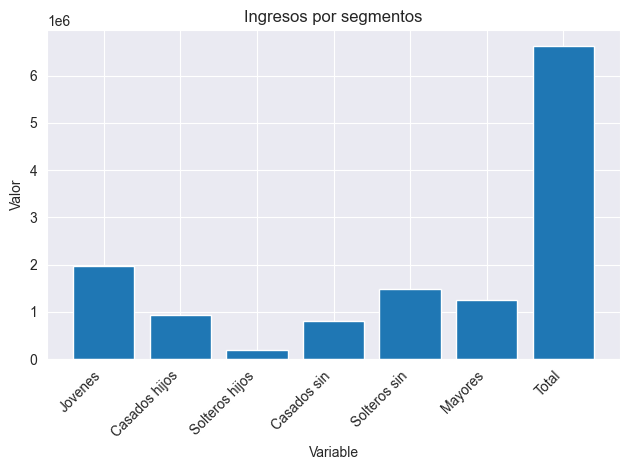

In [176]:
#Gráficos de dinero generado total por segmentos
dinerosegmentos = pd.DataFrame({
    'Variable': ['Jovenes', 'Casados hijos', 'Solteros hijos', 'Casados sin', 'Solteros sin', 'Mayores', 'Total'],
    'Valor': [dinerojovenes, dinerocasadoshijos, dinerosolterohijos, dinerocasadono, dinerosolterosno, dineromayores, ingresos_totales_empresa]
})

plt.bar(dinerosegmentos['Variable'], dinerosegmentos['Valor'])
plt.xlabel('Variable')
plt.ylabel('Valor')
plt.title('Ingresos por segmentos')
plt.xticks(rotation=45, ha='right')  # Rotación de los nombres
plt.tight_layout()  # Ajuste automático del diseño para evitar superposiciones
plt.show()

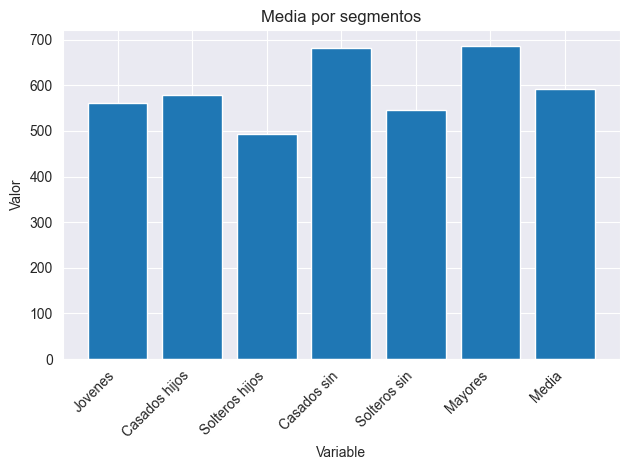

In [177]:
#Gráfico de dinero medio por cliente por segmentos
dineromedia = pd.DataFrame({
    'Variable': ['Jovenes', 'Casados hijos', 'Solteros hijos', 'Casados sin', 'Solteros sin', 'Mayores', 'Media'],
    'Valor': [dinerojovenes/numjovenes, dinerocasadoshijos/numcasadoshijos, dinerosolterohijos/numsolteroshijos, dinerocasadono/numcasadosno, dinerosolterosno/numsolterono, dineromayores/nummayores, ingresos_totales_empresa/numclientes]
})

plt.bar(dineromedia['Variable'], dineromedia['Valor'])
plt.xlabel('Variable')
plt.ylabel('Valor')
plt.title('Media por segmentos')
plt.xticks(rotation=45, ha='right')  # Rotación de los nombres
plt.tight_layout()  # Ajuste automático del diseño para evitar superposiciones
plt.show()



In [178]:
#Conclusiones    
#La mayor fuente de ingresos viene de los jóvenes menores de 30 años. De estos clientes la empresa genera 1970892.16€, el 29,88% del total (6627214.56€).

#Por otro lado, si nos centramos en la mayor fuente de ingresos por persona, el grupo que más nos genera sería el de mayores de 60 años con una tarifa de 686.11€ de media.

In [179]:
#Almacenamos aquellos clientes que dejan la compañía
clientes_churn = clients.dropna(subset=['churn_date'])
clientes_churn

,customerid,gender,paperlessbilling,paymentmethod,children,contract_date,married,churn_date,country,zipcode,contract_channel,Edad
2,5cf42e9ba3bfa476bc222bebcf63f1a8,Male,Yes,Mailed check,0,2022-11-07,No,2023-05-13,ES,45466,None,13
4,0467f23d6b9e7891da40ed53339f5725,Female,Yes,Electronic check,0,2022-11-06,No,2023-08-20,ES,10119,None,50
5,a3eb2b52fe0a63d2351819270bcedbf6,Female,Yes,Electronic check,0,2022-05-17,No,2023-09-08,ES,31255,None,13
8,b6e3534f9b289114eab3721f4cf6f2f9,Female,Yes,Electronic check,0,2020-09-08,Yes,2023-03-04,ES,40269,None,46
13,34af156cf33959c65838f86c0c9b645b,Male,Yes,Bank transfer (automatic),0,2018-12-25,No,2023-06-08,ES,38075,None,51
...,...,...,...,...,...,...,...,...,...,...,...,...
11253,e8f2f4b4da13b8d358fadef0cc4d63e4,Female,Yes,Credit card (automatic),0,2022-08-19,No,2023-05-27,ES,08554,None,79
11260,8de6221b3997dc1713808dcffcb437e5,Male,Yes,Electronic check,0,2022-12-08,Yes,2023-08-18,ES,08471,None,51
11265,4f7479fd8b8cb089cf02bbe3557c7656,Male,Yes,Electronic check,2,2022-12-17,Yes,2023-06-17,ES,19605,None,31
11266,70c4cda7ec0c8a1c40056b1da9f75403,Male,No,Bank transfer (automatic),0,2022-11-09,No,2023-08-02,ES,26622,None,13


In [180]:
#Obtenemos los id de los clientes que han tenido una permanencia
id_tenure = tenure['customerid'].unique()
id_tenure

array(['3d40ba9d86cc7b97612628a924cd63bc',
       'ce8db6bfb9d902d89f9dc36eb1fc7df9',
       '44a2787f13e8a405664d1ed0e6e8540b', ...,
       '6825b60a7253edd0f62f2bd24787536e',
       'e1e35dcd1799125262af2af11260ddf1',
       '167041637430b3d83cd801a7c43369c9'], dtype=object)

In [181]:
#Obtenemos los clientes que tras la permanencia han decidido dejar la compañía
id_comunes = clientes_churn[clientes_churn['customerid'].isin(id_tenure)]
len(id_comunes)

1084

In [182]:
#Como podemos ver, 1084 clientes de los 2958 totales que se marchan de la compañía, la dejan después de terminar las permanencias. Esto es un 36,6%

In [183]:
#Por otro lado, analizamos el resto de variables de la tabla clients y vemos que el 74,32% de los clientes que se marchan sus facturas son paperless (Aumento del 58,9% que suele haber en la empresa).

#También nos damos cuenta de que el 56.1% de los usuarios pagan por cheque electrónico (Aumento del 33.3% que suele haber en la empresa).

#Analizamos que tienen contratado aquellos que se marchan de la empresa:
contratos = billing.drop(['billing_date', 'monthlycharges'], axis=1)
contratos


,customerid,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,phone_lines,streaming
0,3d40ba9d86cc7b97612628a924cd63bc,DSL,No,Yes,No,No,0,No
1,3d40ba9d86cc7b97612628a924cd63bc,DSL,No,Yes,No,No,0,No
2,3d40ba9d86cc7b97612628a924cd63bc,DSL,No,Yes,No,No,0,No
3,3d40ba9d86cc7b97612628a924cd63bc,DSL,No,Yes,No,No,0,No
4,3d40ba9d86cc7b97612628a924cd63bc,DSL,No,Yes,No,No,0,No
...,...,...,...,...,...,...,...,...
100775,7aea14389aa3d73fd383221574f76778,Fiber optic,No,No,No,No,1,No
100776,7aea14389aa3d73fd383221574f76778,Fiber optic,No,No,No,No,1,No
100777,7aea14389aa3d73fd383221574f76778,Fiber optic,No,No,No,No,1,No
100778,7aea14389aa3d73fd383221574f76778,Fiber optic,No,No,No,No,1,No


In [184]:
#Agrupamos por id de cliente y vemos que tienen contratado (Nos damos cuenta de que no cambian nunca los contratos )
contratosfinal = contratos.groupby('customerid', as_index=False).first()
contratosfinal
#Nos damos cuenta de que no cambian nunca los contratos 

,customerid,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,phone_lines,streaming
0,000aa74f2769e670325b6e7e76805954,No,No internet service,No internet service,No internet service,No internet service,2,No
1,000b82991bd401c1315f9078727bbfa6,Fiber optic,No,Yes,Yes,Yes,2,Yes
2,000d5a06a55dc4fbad11189d1d0c4ed9,Fiber optic,No,No,No,No,2,Yes
3,000dad6dae45218f7d4e711a1d126dc6,Fiber optic,No,No,Yes,No,1,Yes
4,001092464bd85617c6da4dbaec642f30,DSL,No,No,Yes,Yes,1,No
...,...,...,...,...,...,...,...,...
11203,ffe70b20bb6bcfdf0c18af450e520f2a,Fiber optic,No,Yes,No,Yes,1,Yes
11204,ffe815c8b04b06623d58b4f92c485578,Fiber optic,No,No,No,No,1,No
11205,ffe8524f8db7cf1cc8a9cd250969778f,No,No internet service,No internet service,No internet service,No internet service,2,No
11206,fff08f410886528e8a441861d8ebe12e,No,No internet service,No internet service,No internet service,No internet service,1,No


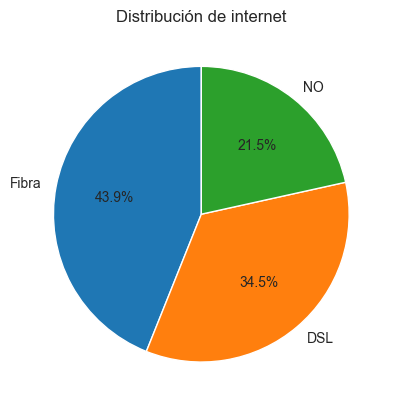

In [185]:
#Analizamos los contratos de los clientes que se marchan de la empresa
conteo_internet = contratosfinal['internetservice'].value_counts()
variables = ['Fibra', 'DSL', 'NO']

# Gráfico de queso
plt.pie(conteo_internet, labels=variables, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de internet')
plt.show()

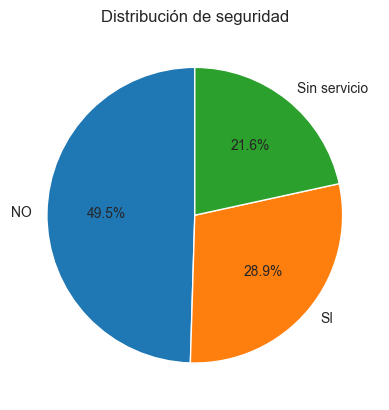

In [186]:
conteo_seguridad = contratosfinal['onlinesecurity'].value_counts()
variables = ['NO', 'SI', 'Sin servicio']

# Gráfico de queso
plt.pie(conteo_seguridad, labels=variables, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de seguridad')
plt.show()

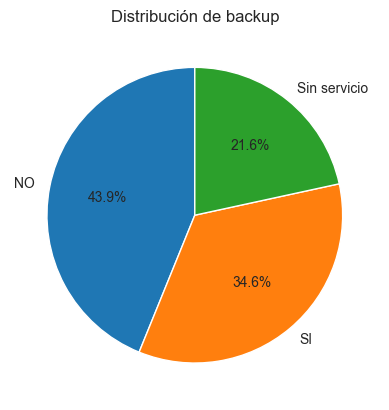

In [187]:
conteo_backup = contratosfinal['onlinebackup'].value_counts()
variables = ['NO', 'SI', 'Sin servicio']

# Gráfico de queso
plt.pie(conteo_backup, labels=variables, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de backup')
plt.show()

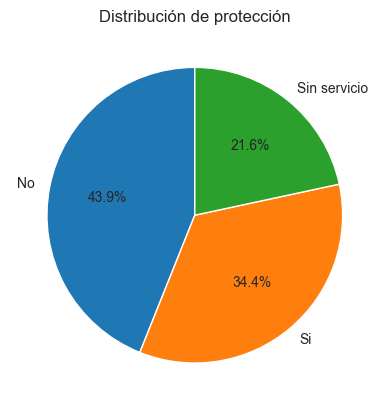

In [188]:
conteo_protect = contratosfinal['deviceprotection'].value_counts()
variables = ['No', 'Si', 'Sin servicio']

# Gráfico de queso
plt.pie(conteo_protect, labels=variables, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de protección')
plt.show()

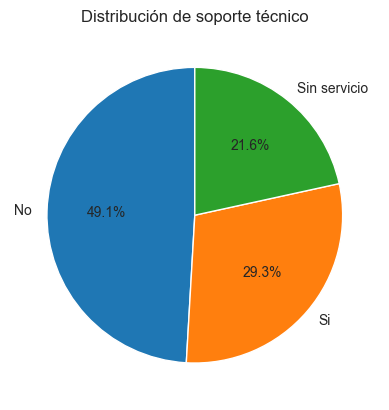

In [189]:
conteo_soport = contratosfinal['techsupport'].value_counts()
variables = ['No', 'Si', 'Sin servicio']

# Gráfico de queso
plt.pie(conteo_soport, labels=variables, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de soporte técnico')
plt.show()

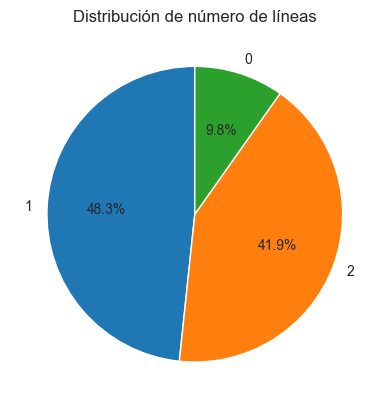

In [190]:
conteo_phone_lines = contratosfinal['phone_lines'].value_counts()
variables = ['1', '2', '0']

# Gráfico de queso
plt.pie(conteo_phone_lines, labels=variables, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de número de líneas')
plt.show()

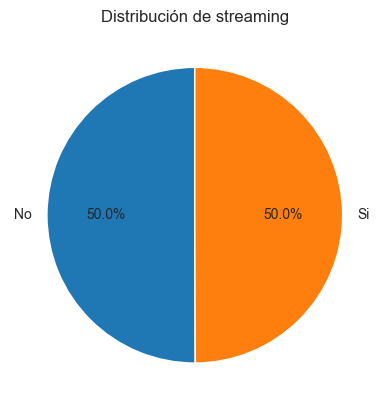

In [191]:
conteo_streaming = contratosfinal['streaming'].value_counts()
variables = ['No', 'Si']

# Gráfico de queso
plt.pie(conteo_streaming, labels=variables, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de streaming')
plt.show()

In [192]:
#La tendencia de características son las siguientes: fibra óptica | sin seguridad online | sin backup online | sin protección de dispositivos | sin soporte técnico | 1 línea | (superan a la otra opción más repetida en un 10% o más)


In [193]:
#Aun así, para quitarnos de más dudas analizamos una última cosa: la cantidad de dinero que pagan anualmente.
churntotal = pd.merge(clientes_churn, billing, on='customerid', how='inner')
reschurntotal = churntotal.groupby('customerid').agg({'monthlycharges': 'sum'}).reset_index()
numchurn = reschurntotal['customerid'].nunique()
dinerochurn = reschurntotal['monthlycharges'].sum()

print(f'{numchurn} clientes han dejado la empresa. Estos gastaban una media de {dinerochurn/numchurn}€ por persona')
#Nos damos cuenta de que los clientes que dejaban la empresa tampoco gastaban mucho dinero, por lo que no nos aporta nada nuevo.

2955 clientes han dejado la empresa. Estos gastaban una media de 469.3104940778343€ por persona


In [194]:
#Conclusión: sabemos que muchos de los clientes que se van es porque terminan su permanencia, pero no sabemos si se van por el precio o por el servicio en comparación a otras compañías. Por lo tanto, la empresa debería de analizar el precio que ofrece en comparación a otras compañías.

#Una forma de retener a los clientes sería ofrecerles un descuento en la factura actual. También podríamos ofrecerles un mejor servicio, aumentar la velocidad de internet, ofrecerles más líneas de teléfono, etc.

#Otra manera interesante de retener a los clientes sería ofrecerles un descuento en la factura si contratan más servicios, por ejemplo, si contratan el servicio de streaming, ofrecerles un descuento en la factura. Esto haría que los clientes se quedaran más tiempo en la empresa y que gastaran más dinero. Incluso se podría aumentar los servicios manteniendo el mismo precio, por ejemplo, si contratan el servicio de streaming, ofrecerles el servicio de seguridad online gratis.

#De estas formas podríamos llegar a aumentar las permanencias de los clientes y, por lo tanto, asegurar y aumentar los ingresos de la empresa a largo plazo.

#Las recomendaciones que has hecho son específicas y relevantes para la empresa. Estas recomendaciones pueden ayudar a la empresa a reducir la tasa de abandono de clientes y a mejorar la retención de clientes.

In [195]:
#Campaña de retención basada en precios
#Almacenamos id de aquellos en riego de irse
id_campana = id_comunes['customerid']
id_campana


8       b6e3534f9b289114eab3721f4cf6f2f9
13      34af156cf33959c65838f86c0c9b645b
22      cf4d3dcf089c650b224975a84ea8ef94
26      7f01ab7b54553939ee188e46b6095a04
27      697ba0a9ae9e04d1166a8b9981e0c775
                      ...               
7008    0a90fab511d935b1290a07d6bf3dd56f
7018    b4ff7e9fb28391acc59076278cf65bfc
7021    0c318c2d89307f4c0be3d6eb701aef64
7032    302618a9c17835dcf8f35cd3032bffb6
7034    91f5f77dc343467bc7838c63c0f4fa0f
Name: customerid, Length: 1084, dtype: object

In [196]:
#Dinero generado por aquellos en peligro de irse

sumas_mensuales = billing.groupby('customerid')['monthlycharges'].sum()
id_campana = id_comunes.merge(sumas_mensuales, how='left', on='customerid')
id_campana.rename(columns={'monthlycharges': 'amount'}, inplace=True)
id_campana = id_campana.drop(['gender', 'paperlessbilling', 'paymentmethod', 'children', 'contract_date', 'married', 'churn_date', 'country', 'zipcode', 'contract_channel', 'Edad'], axis=1)

id_campana

,customerid,amount
0,b6e3534f9b289114eab3721f4cf6f2f9,314.40
1,34af156cf33959c65838f86c0c9b645b,725.90
2,cf4d3dcf089c650b224975a84ea8ef94,60.45
3,7f01ab7b54553939ee188e46b6095a04,397.40
4,697ba0a9ae9e04d1166a8b9981e0c775,120.80
...,...,...
1079,0a90fab511d935b1290a07d6bf3dd56f,345.23
1080,b4ff7e9fb28391acc59076278cf65bfc,635.85
1081,0c318c2d89307f4c0be3d6eb701aef64,179.40
1082,302618a9c17835dcf8f35cd3032bffb6,409.05


In [197]:
#Dinero total generado por los clientes que se van
dinero_total = id_campana['amount'].sum()
dinero_total


514670.78

In [198]:
#Esperamos conseguir mantener al 33,3%

dinero_total = dinero_total * 0.333
dinero_total

171385.36974000002

In [200]:
#Descuento del 20% en la factura
dinero_total = dinero_total * 0.8
dinero_total

109686.63663360002